In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
from torchvision import utils
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

seed = 42
torch.manual_seed(seed=seed)
torch.set_float32_matmul_precision("high")

if device.type == 'cuda':
    torch.cuda.manual_seed_all(seed=seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [3]:
train_dataset = datasets.FashionMNIST(root='/home/pervinco/Datasets/FashionMNIST', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.FashionMNIST(root='/home/pervinco/Datasets/FashionMNIST', train=False, transform=transforms.ToTensor(), download=True)

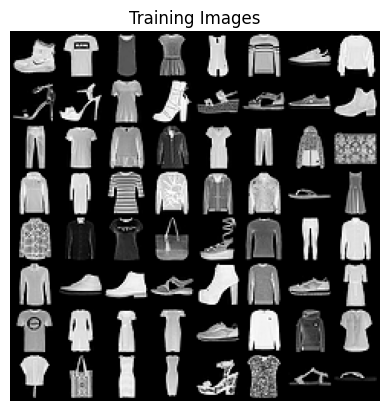

In [4]:
plt.axis('off')
plt.title("Training Images")
plt.imshow(np.transpose(utils.make_grid(torch.cat([train_dataset[i][0].unsqueeze(0) for i in range(64)], dim=0), normalize=True), (1,2,0)))

## Leaky ReLUÏôÄ ReLUÎäî Ïñ¥Îñ§ Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÏÉùÍ∞ÅÌï¥Î≥¥Í∏∞
### ReLU (Rectified Linear Unit):

$$ f(x)=max(0,x) $$ 

ReLUÎäî Í∞ÄÏû• ÎÑêÎ¶¨ ÏÇ¨Ïö©ÎêòÎäî ÌôúÏÑ±Ìôî Ìï®Ïàò Ï§ë ÌïòÎÇòÎ°ú, ÏûÖÎ†•Ïù¥ ÏñëÏàòÏù∏ Í≤ΩÏö∞ÏóêÎäî Í∑∏ÎåÄÎ°ú ÌÜµÍ≥ºÏãúÌÇ§Í≥†, ÏùåÏàòÏù∏ Í≤ΩÏö∞ÏóêÎäî 0ÏúºÎ°ú ÎßåÎì§Ïñ¥ Î≤ÑÎ¶ΩÎãàÎã§.
- Ïû•Ï†ê: Í≥ÑÏÇ∞Ïù¥ Í∞ÑÎã®ÌïòÍ≥†, ÎπÑÏÑ†ÌòïÏÑ±ÏùÑ Ï†úÍ≥µÌïòÎ©∞, Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†ú(vanishing gradient problem)Î•º ÏôÑÌôîÌï©ÎãàÎã§.
- Îã®Ï†ê: ÏùåÏàò ÏûÖÎ†•Ïóê ÎåÄÌï¥ Ï∂úÎ†•Ïù¥ Ìï≠ÏÉÅ 0Ïù¥ÎØÄÎ°ú, ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÌäπÏ†ï Îâ¥Îü∞Ïù¥ Ï£ΩÎäî ÌòÑÏÉÅ(dying ReLU problem)Ïù¥ Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§. Ï¶â, ÏùåÏàò ÏûÖÎ†•ÏùÑ ÏûêÏ£º Î∞õÎäî Îâ¥Îü∞Îì§ÏùÄ Îçî Ïù¥ÏÉÅ ÏóÖÎç∞Ïù¥Ìä∏ÎêòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§.


### Leaky ReLU

Leaky ReLUÎäî ReLUÏùò Î≥ÄÌòïÏúºÎ°ú, ÏùåÏàò ÏûÖÎ†•Ïóê ÎåÄÌï¥ ÏûëÏùÄ Í∏∞Ïö∏Í∏∞Î•º Ïú†ÏßÄÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§.

$$ f(x)=max(0.01x,x)$$  

- Ïó¨Í∏∞ÏÑú 0.01ÏùÄ negative_slope ÏûÖÎãàÎã§.
- Ïû•Ï†ê: ÏùåÏàò ÏûÖÎ†•ÏóêÏÑúÎèÑ Í∏∞Ïö∏Í∏∞Î•º Ïú†ÏßÄÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, Îâ¥Îü∞Ïù¥ ÏôÑÏ†ÑÌûà Ï£ΩÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî Î™®Îç∏Ïù¥ Îçî ÍπäÏùÄ ÎÑ§Ìä∏ÏõåÌÅ¨ÏóêÏÑú Îçî Ïûò ÌïôÏäµÌï† Ïàò ÏûàÍ≤å Ìï©ÎãàÎã§.
- Îã®Ï†ê: ÏùåÏàò Î∂ÄÎ∂ÑÏùò Í∏∞Ïö∏Í∏∞Í∞Ä ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê, Ïó¨Ï†ÑÌûà ÏùåÏàò ÏòÅÏó≠ÏóêÏÑúÏùò ÏóÖÎç∞Ïù¥Ìä∏Îäî Ï†úÌïúÏ†ÅÏùº Ïàò ÏûàÏäµÎãàÎã§.

Í≤∞Î°†Ï†ÅÏúºÎ°ú, Leaky ReLUÎäî ReLUÏùò Îã®Ï†êÏùÑ ÏùºÎ∂Ä Î≥¥ÏôÑÌïòÏó¨ Îçî ÏïàÏ†ïÏ†ÅÏù∏ ÌïôÏäµÏùÑ Í∞ÄÎä•ÌïòÍ≤å ÌïòÏßÄÎßå, Ïù¥Î°ú Ïù∏Ìï¥ Í≥ÑÏÇ∞ ÎπÑÏö©Ïù¥ ÌÅ¨Í≤å Ï¶ùÍ∞ÄÌïòÏßÄ ÏïäÏäµÎãàÎã§. Îî∞ÎùºÏÑú Leaky ReLUÎäî ÏùåÏàò ÏòÅÏó≠ÏóêÏÑúÎèÑ Í∏∞Ïö∏Í∏∞Î•º Ïú†ÏßÄÌï¥Ïïº ÌïòÎäî Í≤ΩÏö∞Ïóê Ïú†Î¶¨Ìï©ÎãàÎã§.


## SigmoidÍ∞Ä ÏïÑÎãå Hyperbolic TangentÎ•º Ïì∞Î©¥ Ïñ¥ÎñªÍ≤å Îê†ÏßÄ ÏÉùÍ∞ÅÌï¥Î≥¥Í∏∞
### Sigmoid Ìï®Ïàò

- Sigmoid Ìï®ÏàòÎäî Ï∂úÎ†•Í∞íÏùÑ (0, 1) Î≤îÏúÑÎ°ú ÏïïÏ∂ïÌï©ÎãàÎã§.
- Ï£ºÎ°ú ÌôïÎ•†ÏùÑ Î™®Îç∏ÎßÅÌïòÍ±∞ÎÇò, Ï∂úÎ†•Ïù¥ [0, 1] ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎèÑÎ°ù Ìï¥Ïïº ÌïòÎäî Í≤ΩÏö∞Ïóê ÏÇ¨Ïö©Îê©ÎãàÎã§.
- Îã®Ï†ê: SigmoidÎäî ÏñëÏ™Ω ÎÅùÏóêÏÑú Í∏∞Ïö∏Í∏∞Í∞Ä Îß§Ïö∞ ÏûëÏïÑÏßÄÎäî Î¨∏Ï†ú(Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†ú)Í∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î°ú Ïù∏Ìï¥ ÍπäÏùÄ Ïã†Í≤ΩÎßùÏóêÏÑú ÌïôÏäµÏù¥ ÎäêÎ†§ÏßÄÍ±∞ÎÇò, Ï¥àÍ∏∞ÌôîÍ∞Ä ÏûòÎ™ªÎêòÎ©¥ ÌïôÏäµÏù¥ Ï†úÎåÄÎ°ú Ïù¥Î£®Ïñ¥ÏßÄÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

## Hyperbolic Tangent (tanh)

tanh Ìï®ÏàòÎäî Ï∂úÎ†•Í∞íÏùÑ (-1, 1) Î≤îÏúÑÎ°ú ÏïïÏ∂ïÌï©ÎãàÎã§.
 
- tanhÎäî ÏûÖÎ†•Ïù¥ 0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Ï∂úÎ†•ÎèÑ 0Ïóê Í∞ÄÍπùÍ≥†, ÌÅ∞ ÏùåÏàòÎÇò ÌÅ∞ ÏñëÏàò ÏûÖÎ†•Ïóê ÎåÄÌï¥ÏÑúÎäî -1 ÎòêÎäî 1Ïóê Í∞ÄÍπåÏö¥ Í∞íÏùÑ Í∞ÄÏßëÎãàÎã§.
- Ïû•Ï†ê: tanhÎäî Ï∂úÎ†•Ïù¥ Ï§ëÏã¨ÏóêÏÑú 0ÏùÑ Í∞ÄÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê, Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Ïù¥ 0Ïóê Í∞ÄÍπùÎèÑÎ°ù Ï†ïÍ∑úÌôîÎêú Í≤ΩÏö∞ Îçî Ïûò ÏûëÎèôÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î°ú Ïù∏Ìï¥ Î™®Îç∏Ïùò ÏàòÎ†¥ ÏÜçÎèÑÍ∞Ä Îπ®ÎùºÏßà Ïàò ÏûàÏäµÎãàÎã§.
- Îã®Ï†ê: SigmoidÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú tanhÎèÑ ÏñëÏ™Ω ÎÅùÏóêÏÑú Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.

Í≤∞Î°†Ï†ÅÏúºÎ°ú, tanhÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Ï∂úÎ†• Î≤îÏúÑÍ∞Ä (-1, 1)Î°ú ÌôïÏû•ÎêòÏñ¥, Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ëÏïôÏóê ÏßëÏ§ëÎêòÏñ¥ ÏûàÎäî Í≤ΩÏö∞ Îçî ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïùº Ïàò ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå, Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†úÎäî Ïó¨Ï†ÑÌûà Ï°¥Ïû¨Ìï† Ïàò ÏûàÏúºÎØÄÎ°ú, Ïù¥Î•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Ï∂îÍ∞ÄÏ†ÅÏù∏ Í∏∞Ïà†(Ïòà: batch normalization ÎòêÎäî Í≥†Í∏â ÌôúÏÑ±Ìôî Ìï®Ïàò)ÏùÑ ÏÇ¨Ïö©Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

Îî∞ÎùºÏÑú, Ï∂úÎ†•Ïù¥ 0ÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÎåÄÏπ≠Ï†ÅÏù∏ Í∞íÏùÑ Í∞ÄÏßÄÎäî Í≤ΩÏö∞Í∞Ä Ïú†Î¶¨Ìïú ÏÉÅÌô©Ïù¥ÎùºÎ©¥ tanhÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Îçî Ï†ÅÌï©Ìï† Ïàò ÏûàÏúºÎ©∞, Î∞òÎåÄÎ°ú Ï∂úÎ†•ÏùÑ 0Í≥º 1 ÏÇ¨Ïù¥Î°ú Ï†úÌïúÌï¥Ïïº ÌïòÎäî Í≤ΩÏö∞ÎùºÎ©¥ sigmoidÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.

In [5]:
## Encoder, Decoder Íµ¨Ï°∞Îäî ÏùºÎ∞ò AutoEncoderÍ≥º ÎèôÏùº

class Encoder(nn.Module):
    def __init__(self, latent_dim: int=20):
        super().__init__()

        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc_mean = nn.Linear(128, latent_dim)

    def forward(self, x: torch.Tensor):
        x = x.view(x.size(0), -1)
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)
        z = F.leaky_relu(self.fc_mean(x))
        return z
    
class Decoder(nn.Module):
    def __init__(self, latent_dim: int=20):
        super().__init__()

        self.fc1 = nn.Linear(latent_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 784)

    def forward(self, z: torch.Tensor):
        z = F.leaky_relu(self.fc1(z), negative_slope=0.2)
        z = F.leaky_relu(self.fc2(z), negative_slope=0.2)
        x_hat = F.sigmoid(self.fc3(z))
        x_hat = x_hat.view(x_hat.size(0), 1, 28, 28)

        return x_hat

In [6]:
class Autoencoder(nn.Module):
    def __init__(self, encoder=Encoder, decoder=Decoder, latent_dim: int=20):
        super().__init__()
        self.encoder = encoder(latent_dim=latent_dim)
        self.decoder = decoder(latent_dim=latent_dim)

        self.latent_dim = latent_dim

    def forward(self, x: torch.Tensor):
        z = self.encode(x)
        x_hat = self.decode(z)
        return z, x_hat

    def encode(self, x: torch.Tensor):
        return self.encoder(x)

    def decode(self, z: torch.Tensor):
        return self.decoder(z)

Ïù∏ÏΩîÎçî ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÎ∞õÏïÑ Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÎ•º Î≥ÄÎ∂Ñ Ïù∏ÏΩîÎçî ÌÅ¥ÎûòÏä§Î•º Íµ¨ÌòÑÌï©ÎãàÎã§. Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏùò Ïù∏ÏΩîÎçî ÌÅ¥ÎûòÏä§ÏôÄÏùò Ï∞®Ïù¥Ï†êÏùÄ Ìïú Í∞ÄÏßÄÏûÖÎãàÎã§. Ïù∏ÏΩîÎçîÏùò Ï∂úÎ†•Ïù¥ Í≤∞Ï†ïÎ°†Ï†Å (Deterministic) Í∞íÏù¥ ÏïÑÎãå ÌôïÎ•†Ï†Å (Probabilistic) ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏûÖÎãàÎã§.

In [7]:
## Encoder ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜç Î∞õÏïòÍ∏∞ ÎïåÎ¨∏Ïóê Î∂ÄÎ™® ÌÅ¥ÎûòÏä§Ïóê Ï†ïÏùòÎêú Í≤ÉÎì§ÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.
class VariationalEncoder(Encoder):
    def __init__(self, latent_dim: int=20):
        super().__init__(latent_dim=latent_dim)
        self.fc_log_var = nn.Linear(128, latent_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1) ## flatten
        x = F.leaky_relu(self.fc1(x), negative_slope=0.2)
        x = F.leaky_relu(self.fc2(x), negative_slope=0.2)

        # Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏôÄÏùò Ï£ºÏöî Ï∞®Ïù¥Ï†ê
        mean = self.fc_mean(x) ## ÏùºÎ∞ò Ïò§ÌÜ†Ïù∏ÏΩîÎçîÎäî Ïó¨Í∏∞ÏÑú Î∞òÌôòÌïòÎäî Í∞íÏù¥ Ïû†Ïû¨ Î≤°ÌÑ∞
        log_var = self.fc_log_var(x) ## meanÏùÑ ÏûÖÎ†•ÌïòÎäîÍ≤å ÏïÑÎãàÎùº xÎ•º ÏûÖÎ†•Ìï¥ÏÑú log_varianceÎ•º ÏñªÎäîÎã§.

        return mean, log_var ## meanÍ≥º log_varianceÎ•º Î∞òÌôò

Ïò§ÌÜ† Ïù∏ÏΩîÎçî ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÎ∞õÏïÑ Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçî ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùòÌï©ÎãàÎã§. Ïò§ÌÜ† Ïù∏ÏΩîÎçî ÌÅ¥ÎûòÏä§ÏôÄÏùò Ï∞®Ïù¥Ï†êÏùÄ ÌÅ¨Í≤å Îëê Í∞ÄÏßÄÏûÖÎãàÎã§.

1. Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôî Íµ¨ÌòÑ: Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôî Ìä∏Î¶≠ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏùò Í∏∞Ïö∏Í∏∞ Í≥ÑÏÇ∞ÏùÑ Í∞ÄÎä•ÌïòÍ≤å Ìï©ÎãàÎã§.
2. forward Î©îÏÜåÎìúÏóê Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôî Í≥ºÏ†ïÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ÏÉòÌîåÎßÅ Í≥ºÏ†ïÏùÑ ÏßÑÌñâ

In [8]:
class VariationalAutoencoder(Autoencoder):
    def __init__(self, encoder=VariationalEncoder, decoder=Decoder, latent_dim: int=16):
        super().__init__(latent_dim=latent_dim)
        self.encoder = encoder(latent_dim)

    def reparameterize(self, mean: torch.Tensor, log_var: torch.Tensor):
        ## ÏÉòÌîåÎßÅ ÏãúÏóêÎèÑ Í∏∞Ïö∏Í∏∞Î•º Ï†ÑÎã¨Ìï† Ïàò ÏûàÎèÑÎ°ù Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôî Ìï©ÎãàÎã§.
        std = torch.exp(0.5 * log_var) ## log_varianceÎ•º standard deviationÏúºÎ°ú Î∞îÍæºÎã§.
        
        # randn_like Î©îÏÜåÎìúÎäî ÏûÖÎ†•Îêú Ïù∏ÏûêÏôÄ Í∞ôÏùÄ Ï∞®ÏõêÏùò Í∞íÎì§ÏùÑ ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅÌïòÏó¨ Î∞òÌôòÌï©ÎãàÎã§.
        epsilon = torch.randn_like(std)

        return mean + (epsilon * std)

    def forward(self, x: torch.Tensor):
        # Ïù∏ÏΩîÎçîÎ•º ÌÜµÌï¥ ÏñªÏñ¥ÏßÄÎäî Í∞íÏù¥ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏôÄ Îã§Î¶ÖÎãàÎã§.
        mean, log_var = self.encode(x)

        # Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôîÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
        z = self.reparameterize(mean, log_var)
        
        # Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏôÄ Í∞ôÏäµÎãàÎã§.
        x_hat = self.decode(z)

        return x_hat, mean, log_var

Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÎäî Ïò§ÌÜ† Ïù∏ÏΩîÎçî Íµ¨Ï°∞Î•º Í∞ÄÏßÄÎäî **ÏÉùÏÑ± Î™®Îç∏**Ïù¥Î©∞, Ïû†Ïû¨ Î≥ÄÏàòÎ°úÎ∂ÄÌÑ∞ ÎîîÏΩîÎî© Í≥ºÏ†ïÏùÑ Í±∞Ï≥ê Îç∞Ïù¥ÌÑ∞Î•º **ÏÉùÏÑ±**Ìï©ÎãàÎã§. Ï¶â, Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÎäî Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º **Î≥µÏõê**ÌïòÎäî Í≤ÉÍ≥ºÎäî Îã§Î•∏ Î™©Ï†ÅÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÏäµÎãàÎã§. Ïù¥ Í≥ºÏ†ïÏùÑ Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏóêÏÑúÎäî **ÏÉòÌîåÎßÅ**ÏùÑ ÌÜµÌï¥ ÏßÑÌñâÌï©ÎãàÎã§. Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏóêÏÑú ÌïòÎÇòÏùò Í∞íÏúºÎ°ú Ï†ïÌï¥Ï°åÎçò Ïù∏ÏΩîÎçîÏùò Ï∂úÎ†•Ïù¥, ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ Îëê Í∞ÄÏßÄÎ°ú ÎÇòÎâòÎ©∞ Í∞íÏù¥ ÏïÑÎãå Î∂ÑÌè¨Î•º Ï∂úÎ†•ÌïòÍ≤å Îê©ÎãàÎã§. ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï†ïÍ∑ú Î∂ÑÌè¨Î•º Ï∂îÏ†ïÌïú ÌõÑ, Ìï¥Îãπ Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤å Îê©ÎãàÎã§.

Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏùò ÎîîÏΩîÎçîÎäî Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏùò ÎîîÏΩîÎçîÏôÄ Í∞ôÏúºÎ©∞, Îç∞Ïù¥ÌÑ∞Î•º **ÏÉùÏÑ±**ÌïòÎäî Ïó≠Ìï†ÏùÑ Îã¥ÎãπÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïúÎã§Í≥† Í∞ÄÏ†ïÌñàÏùÑ Îïå, ÎîîÏΩîÎçîÏùò Ï∂úÎ†• Í∞í Î≤îÏúÑÏóê ÎåÄÌï¥ ÌïúÎ≤à ÏÉùÍ∞ÅÌï¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§. ÎîîÏΩîÎçîÏùò Ï∂úÎ†•ÏùÄ, Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Í∑ºÏÇ¨ÌïòÎäî Í≤ÉÏùÑ Î™©Ï†ÅÏúºÎ°ú ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†• Í∞íÏùò Î∂ÑÌè¨ÏôÄ ÎèôÏùºÌïú Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§. Ïù∏Í≥µ Ïã†Í≤ΩÎßùÏùÑ ÌïôÏäµÌï† Îïå, Î≥¥Ìé∏Ï†ÅÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Îäî 0 ~ 1 ÏÇ¨Ïù¥ Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôîÎêòÏñ¥ ÏûÖÎ†•Îê©ÎãàÎã§. Îî∞ÎùºÏÑú ÎîîÏΩîÎçîÏùò Î∂ÑÌè¨ ÎòêÌïú 0 ~ 1 ÏÇ¨Ïù¥ Í∞íÏúºÎ°ú Ï∂úÎ†•ÎêòÎäî Í≤ÉÏù¥ Î∞îÎûåÏßÅÌï©ÎãàÎã§. Îî∞ÎùºÏÑú ÎîîÏΩîÎçîÏùò Ï∂úÎ†• Î∂ÑÌè¨Î•º Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨Î°ú Í∞ÄÏ†ïÌïòÎäî Í≤ÉÎèÑ ÌïòÎÇòÏùò ÏÑ†ÌÉùÏûÖÎãàÎã§. ÎîîÏΩîÎçîÏùò Ï∂úÎ†• Î∂ÑÌè¨Î•º Î≤†Î•¥ÎàÑÏù¥ Î∂ÑÌè¨Î°ú Í∞ÄÏ†ïÌïúÎã§Î©¥, Î≥µÏõê ÏÜêÏã§ÏùÑ MSE ÏÜêÏã§Ïù¥ ÏïÑÎãàÎùº Ïù¥ÏßÑ ÍµêÏ∞® ÏóîÌä∏Î°úÌîº (Binary Cross Entropy, BCE) ÏÜêÏã§ÏùÑ ÏÇ¨Ïö©ÌïòÍ≤å Îê©ÎãàÎã§.

In [9]:
def binary_cross_entropy(x, recon):
    return -torch.sum(x * torch.log(recon) + (1 - x) * torch.log(1 - recon))

def KLDivergenceLoss(mean, log_var):
    return torch.sum(-0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp()))

ÌïôÏäµÏóê ÌïÑÏöîÌïú Ï¥àÎß§Í∞úÎ≥ÄÏàò (Hyper-parameters)Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.

In [10]:
epochs = 10
batch_size = 100
learning_rate = 0.001
latent_dim = 20

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Ï†ïÏùòÌïú Ïò§ÌÜ† Ïù∏ÏΩîÎçî ÌÅ¥ÎûòÏä§ ÌïôÏäµÏùÑ ÏúÑÌïú ÏÜêÏã§ Ìï®Ïàò (Loss function), ÏµúÏ†ÅÌôîÍ∏∞ (Optimizer)Î•º Ï†ïÏùòÌï©ÎãàÎã§. Î≥µÏõê (Reconstruction) ÌÉúÏä§ÌÅ¨Î•º ÏúÑÌï¥ ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞® (MSE, Mean Squared Error) ÏÜêÏã§ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. Adam ÏµúÏ†ÅÌôîÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÍ≥†, ÏµúÏ†ÅÌôîÍ∏∞Ïóê ÌïôÏäµÎ•† Ïô∏Ïùò Îã§Î•∏ Îß§Í∞úÎ≥ÄÏàòÎäî ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§.

In [11]:
from torch import optim

vae = VariationalAutoencoder(latent_dim=latent_dim).to(device)

# ÎîîÏΩîÎçîÏùò ÏÜêÏã§ Ìï®ÏàòÎ•º ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®Î•º ÌôúÏö©Ìï†ÏßÄ, Ïù¥ÏßÑ ÍµêÏ∞® ÏóîÌä∏Î°úÌîºÎ•º ÌôúÏö©Ìï†ÏßÄ
# recon_loss = nn.MSELoss(reduction='sum')
recon_loss = binary_cross_entropy
kld_loss = KLDivergenceLoss
# KL-DivergenceÏùò Í∞ÄÏ§ëÏπòÎ•º ÏÑ§Ï†ïÌï©ÎãàÎã§. Í∏∞Î≥∏ Í∞íÏùÄ 1ÏûÖÎãàÎã§.
beta = 1

optimizer = optim.Adam(params=list(vae.parameters()), lr=learning_rate)

In [12]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÖãÍ≥º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÖãÏóê ÎåÄÌï¥ Î≥µÏõê ÏÜêÏã§Í≥º KL-Divergence ÏÜêÏã§ÏùÑ Í∏∞Î°ùÌï©ÎãàÎã§.
history = dict(
    train_recon=[],
    train_kld=[],
    valid_recon=[],
    valid_kld=[]
)

print(f"Training start with {epochs} epochs.")
for epoch in range(1, 1 + epochs):
    # ÌõàÎ†® Ï†ïÎ≥¥Î•º Í∏∞Î°ùÌï©ÎãàÎã§.
    train_epoch_recon = 0
    train_epoch_kld = 0
    train_size = 0

    vae.train()
    for i, batch in enumerate(train_loader):
        image, label = batch
        image = image.to(device)
        train_size += label.size(0)


        # Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏùò Ïù∏ÏΩîÎçîÍ∞Ä ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Î∞òÌôòÌï©ÎãàÎã§.
        latent_mean, latent_log_var = vae.encode(image)
        # Ïù∏ÏΩîÎçîÍ∞Ä Î∞òÌôòÌïú ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏúºÎ°ú Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôî Ìä∏Î¶≠ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïû†Ïû¨ Î≥ÄÏàòÎ•º ÏñªÏäµÎãàÎã§.
        latent = vae.reparameterize(latent_mean, latent_log_var)
        # Ïû†Ïû¨ Î≥ÄÏàòÎ°úÎ∂ÄÌÑ∞ Ïù¥ÎØ∏ÏßÄÎ•º Î≥µÏõêÌï©ÎãàÎã§.
        reconstruction_image = vae.decode(latent)

        # ÏÜêÏã§ Ìï®ÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÎçîÌï¥Ï§çÎãàÎã§.
        train_recon = recon_loss(image, reconstruction_image)
        train_kld = kld_loss(latent_mean, latent_log_var)
        train_loss = train_recon + beta*train_kld

        train_epoch_recon += train_recon.item()
        train_epoch_kld += train_kld.item()

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

    test_epoch_recon = 0
    test_epoch_kld = 0
    test_size = 0

    vae.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            image, label = batch
            image = image.to(device)
            test_size += label.size(0)

            latent_mean, latent_log_var = vae.encode(image)
            latent = vae.reparameterize(latent_mean, latent_log_var)
            reconstruction_image = vae.decode(latent)

            test_recon = recon_loss(image, reconstruction_image)
            test_kld = kld_loss(latent_mean, latent_log_var)
            test_loss = test_recon + test_kld

            test_epoch_recon += test_recon.item()
            test_epoch_kld += test_kld.item()

    train_epoch_recon /= train_size
    train_epoch_kld /= train_size
    test_epoch_recon /= test_size
    test_epoch_kld /= test_size

    history["train_recon"].append(train_epoch_recon)
    history["train_kld"].append(train_epoch_kld)
    history["valid_recon"].append(test_epoch_recon)
    history["valid_kld"].append(test_epoch_kld)

    print(
        f"{epoch}th epoch: "
        + f"Train Recon Loss = {train_epoch_recon:.4f}, "
        + f"KLD loss = {train_epoch_kld:.4f}, "
        + f"Test Recon Loss = {test_epoch_recon:.4f}, "
        + f"KLD loss = {test_epoch_kld:.4f}"
    )

Training start with 30 epochs.
1th epoch: Train Recon Loss = 272.7649, KLD loss = 11.5258, Test Recon Loss = 248.2540, KLD loss = 11.5670
2th epoch: Train Recon Loss = 242.4504, KLD loss = 11.7689, Test Recon Loss = 240.6015, KLD loss = 12.2242
3th epoch: Train Recon Loss = 236.8098, KLD loss = 12.2603, Test Recon Loss = 236.9898, KLD loss = 12.4460
4th epoch: Train Recon Loss = 234.1997, KLD loss = 12.5545, Test Recon Loss = 234.6927, KLD loss = 12.7834
5th epoch: Train Recon Loss = 232.4634, KLD loss = 12.7771, Test Recon Loss = 232.9591, KLD loss = 13.1458
6th epoch: Train Recon Loss = 231.2178, KLD loss = 12.9040, Test Recon Loss = 231.6801, KLD loss = 13.5900
7th epoch: Train Recon Loss = 230.3688, KLD loss = 13.0194, Test Recon Loss = 231.4165, KLD loss = 13.4621
8th epoch: Train Recon Loss = 229.6377, KLD loss = 13.1228, Test Recon Loss = 230.9507, KLD loss = 13.0915
9th epoch: Train Recon Loss = 229.0310, KLD loss = 13.1838, Test Recon Loss = 231.0924, KLD loss = 12.8850
10th e

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÜêÏã§Í≥º Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÜêÏã§ÏùÑ ÏãúÍ∞ÅÌôîÌïòÏó¨ ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.

In [13]:
# ÌõàÎ†® ÏÜêÏã§Í≥º Í≤ÄÏ¶ù ÏÜêÏã§Ïóê ÎåÄÌï¥ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
def visualize_loss(epochs, train_loss, valid_loss):
    x_len = np.arange(epochs)
    plt.plot(x_len, train_loss, marker=".", c="blue", label="Train Loss")
    plt.plot(x_len, valid_loss, marker=".", c="red", label="Valid Loss")
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏùò ÏÉùÏÑ± Ïù¥ÎØ∏ÏßÄÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§. Î≥µÏõê ÏÜêÏã§ Ìï®ÏàòÎ°ú BCE LossÎ•º ÏÇ¨Ïö©Ìïú Í≤ÉÍ≥º MSE LossÎ•º ÏÇ¨Ïö©Ìïú Í≤ÉÏùÑ ÎπÑÍµêÌï¥Î≥¥Î©¥ Ï¢ãÏäµÎãàÎã§.

In [14]:
# Î™á Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞ Î∞∞ÏπòÎ•º ÏÇ¨Ïö©Ìï†ÏßÄ ÏÑ†ÌÉùÌï©ÎãàÎã§.
select = 0

vae.eval()
with torch.no_grad():
    for i, batch in enumerate(test_loader):
        if i != select:
            continue

        # `select` Î≤àÏß∏ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏ÏòµÎãàÎã§.
        test_image, test_label = batch

        test_image = test_image.to(device)
        test_image = test_image.view(batch_size, 1 * 28 * 28)

        reconstruction, mean, log_var = vae(test_image)

Î≥µÏõê Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

Îç∞Ïù¥ÌÑ∞ Î∞∞ÏπòÏùò Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§.


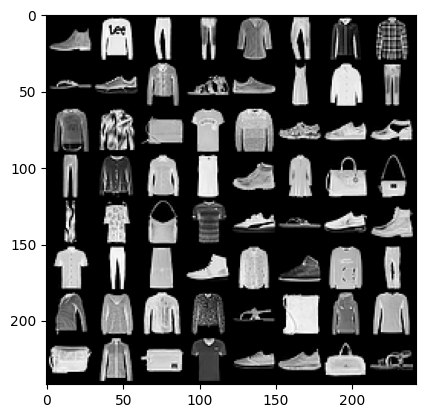

Î≥µÏõêÎêú Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§.


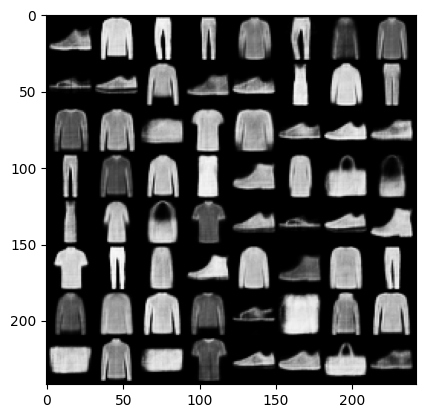

In [15]:
print("Îç∞Ïù¥ÌÑ∞ Î∞∞ÏπòÏùò Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§.")
plt.imshow(utils.make_grid(test_image[:64].cpu().view(-1, 1, 28, 28)).permute(1, 2, 0))
plt.show()

print("Î≥µÏõêÎêú Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§.")
plt.imshow(utils.make_grid(reconstruction[:64].cpu().view(-1, 1, 28, 28)).permute(1, 2, 0))
plt.show()

In [16]:
with torch.no_grad():
    noise = torch.randn(batch_size, latent_dim).to(device)
    generated_images = vae.decode(noise)

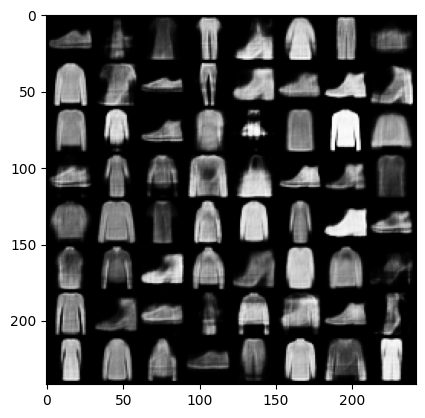

In [17]:
plt.imshow(utils.make_grid(generated_images[:64].cpu().view(-1, 1, 28, 28)).permute(1, 2, 0))
plt.show()

Ïù¥ Í≥ºÏ†ïÏùÄ Ïù¥Î°†Ï†ÅÏúºÎ°ú Ìï©Î¶¨Ï†ÅÏù¥ÎÇò, Ìïú Í∞ÄÏßÄ Î¨∏Ï†úÏ†êÏù¥ ÏûàÏäµÎãàÎã§. ÏÉòÌîåÎßÅ Í≥ºÏ†ïÏù¥ Ìè¨Ìï®ÎêòÎäî Í≤ΩÏö∞ ÎØ∏Î∂ÑÏù¥ Í∞ÄÎä•ÌïòÏßÄ ÏïäÍ≥†, Ïù¥Îäî Ïù∏Í≥µ Ïã†Í≤ΩÎßùÏùò ÌïµÏã¨Ï†ÅÏù∏ ÌïôÏäµ Î∞©ÏãùÏù∏ Í∏∞Ïö∏Í∏∞ ÌïòÍ∞ï Í∏∞Î∞òÏùò ÌïôÏäµÏùÑ Î∂àÍ∞ÄÎä•ÌïòÍ≤å ÎßåÎì≠ÎãàÎã§. Ïù¥Ïú†Îäî Í∞ÑÎã®Ìï©ÎãàÎã§. Îß§ ÏÉòÌîåÎßÅ ÏãúÏ†êÎßàÎã§ Í∏∞Ïö∏Í∏∞Î•º Í≥ÑÏÇ∞Ìï¥Ïïº Ìï† ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞Ïù¥ Î≥ÄÌïòÍ∏∞ ÎïåÎ¨∏ÏûÖÎãàÎã§. Ïù¥Î•º Ìï¥Í≤∞ÌïòÍ∏∞ÏÑúÎäî ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞ÏùÑ Í≥†Ï†ïÌï¥Ïïº ÌïòÎäîÎç∞, Í∑∏Í≤ÉÏùÄ Îã§Ïãú Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏôÄ Í∞ôÏïÑÏßÄÍ≤å ÎêòÎØÄÎ°ú, Ïö∞Î¶¨Îäî Ïù¥Î•º Îã§Î•∏ Î∞©ÏãùÏúºÎ°ú Ìï¥Í≤∞Ìï©ÎãàÎã§. ÏÉòÌîåÎßÅ Í≥ºÏ†ïÏù¥ Ìè¨Ìï®Îêú Í≥ÑÏÇ∞Ïù¥ Í∏∞Ïö∏Í∏∞Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÎã§Îäî Í≤ÉÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌïú Ï†úÏïàÎêú Î∞©ÏãùÏù¥ **Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôî**ÏûÖÎãàÎã§. Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôîÎäî Ï†ïÍ∑ú Î∂ÑÌè¨Ïùò ÌäπÏÑ±Ïóê Í∏∞Ïù∏ÌïòÏó¨ ÎèôÏûëÌï©ÎãàÎã§. Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÌèâÍ∑† $\mu$ Í≥º ÌëúÏ§ÄÌé∏Ï∞® $\sigma$ÏùÑ Í≥†Ï†ïÌïú Ï±ÑÎ°ú ÏûÑÏùòÏùò ÎÖ∏Ïù¥Ï¶à $\epsilon$ÏùÑ Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅÌïú ÌõÑ $\mu + \sigma^2 * \epsilon$ÏùÑ Í≥ÑÏÇ∞ÌïòÎ©¥, Ïù¥ Í∞íÏùÄ $(\mu, \sigma^2)$ÏóêÏÑú ÏÉòÌîåÎßÅÌïú ÏûÑÏùòÏùò Í∞íÍ≥º Í∞ôÎã§Îäî Í≤ÉÏûÖÎãàÎã§. ÏàòÏãùÏúºÎ°ú ÌëúÌòÑÌïòÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
$$z \sim N(\mu, \sigma^2I) \leftrightarrow z = \mu + \sigma^2 * \epsilon, \epsilon \sim N(0, I)$$

üí° Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÌèâÍ∑†Ïù¥ 10, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 5Ïù∏ Í∞íÏùÑ 1000Í∞ú ÏÉòÌîåÎßÅÌï©ÎãàÎã§.

In [18]:
import numpy as np

mean = 10; std = 5; N = 1000

In [19]:
dist_origin = np.random.normal(mean, std, N)
print(f"Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†ÏùÄ {dist_origin.mean()} ÏûÖÎãàÎã§.")
print(f"Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÌëúÏ§Ä Ìé∏Ï∞®Îäî {dist_origin.std()} ÏûÖÎãàÎã§.")

Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†ÏùÄ 9.895675546021828 ÏûÖÎãàÎã§.
Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÏÉòÌîåÎßÅÌïú Îç∞Ïù¥ÌÑ∞Ïùò ÌëúÏ§Ä Ìé∏Ï∞®Îäî 5.055973865630012 ÏûÖÎãàÎã§.


Ï†ïÍ∑ú Î∂ÑÌè¨ÏóêÏÑú ÌèâÍ∑†Ïù¥ 0, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1Ïù∏ Í∞íÏùÑ 1000Í∞ú ÏÉòÌîåÎßÅÌïú ÌõÑ, Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôîÎ•º ÌÜµÌï¥ ÌèâÍ∑†Ïù¥ 10, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 5Ïù∏ Ï†ïÍ∑ú Î∂ÑÌè¨Ï≤òÎüº ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [20]:
dist_reparam = mean + std*np.random.normal(0, 1, N)
print(f"Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôîÎ•º Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†ÏùÄ {dist_reparam.mean()} ÏûÖÎãàÎã§.")
print(f"Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôîÎ•º Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Ïùò ÌëúÏ§Ä Ìé∏Ï∞®Îäî {dist_reparam.std()} ÏûÖÎãàÎã§.")

Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôîÎ•º Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†ÏùÄ 10.032806804115465 ÏûÖÎãàÎã§.
Ïû¨Îß§Í∞úÎ≥ÄÏàòÌôîÎ•º Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Ïùò ÌëúÏ§Ä Ìé∏Ï∞®Îäî 5.0404795469619765 ÏûÖÎãàÎã§.


Î∂ÑÌè¨ Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

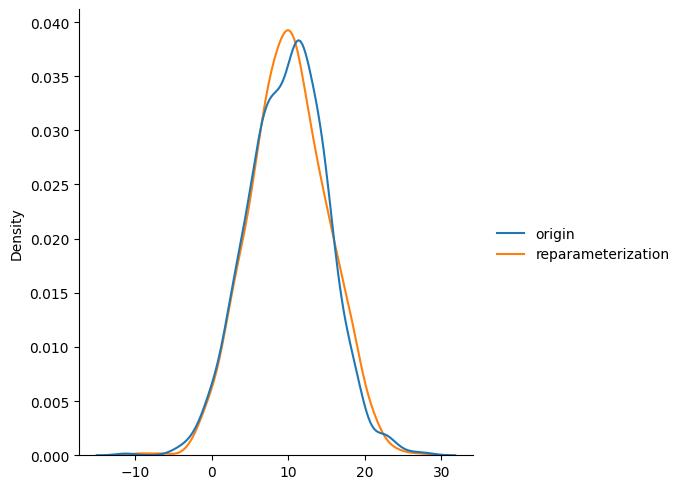

In [21]:
import seaborn as sns

sns.displot(
    dict(
        origin=dist_origin,
        reparameterization=dist_reparam
    ), multiple="layer", kind="kde"
)

ÏÜêÏã§ Ìï®Ïàò Í¥ÄÏ†êÏóêÏÑú, Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏôÄ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏùò Ïú†ÏùºÌïú Ï∞®Ïù¥Îäî KL-Divergence ÌïòÎÇò ÎøêÏûÖÎãàÎã§. Ï¶â Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏôÄ Íµ¨Î∂ÑÎêòÎäî Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÏùò ÌïµÏã¨ Ï§ë ÌïòÎÇòÏûÖÎãàÎã§. Ïã§ÏäµÏóêÏÑúÎäî Ïôú Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÍ∞Ä KL-DivergnceÎ•º Ïù¥Ïö©ÌïòÏó¨ ELBOÎ•º Í≥ÑÏÇ∞ÌïòÍ≤å ÎêòÎäîÏßÄÍπåÏßÄÎäî Îã§Î£®ÏßÄ ÏïäÏäµÎãàÎã§. KL-DivergenceÎäî Îëê ÌôïÎ•† Î∂ÑÌè¨ $P, Q$Í∞Ä ÏûàÏùÑ Îïå, Îëê Î∂ÑÌè¨Ïùò **Î∞úÏÇ∞ (Í±∞Î¶¨ X!!)**ÏûÖÎãàÎã§. ÏàòÏãùÏúºÎ°úÎäî ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÌëúÌòÑÎê©ÎãàÎã§.
$$D_{KL}(P||Q) = \sum_{i}{P(i)\log\frac{P(i)}{Q(i)}}$$

KL-DivergenceÎäî ÏûÑÏùòÏùò ÌôïÎ•† Î∂ÑÌè¨ $P$Í∞Ä ÏûàÏùÑ Îïå, Í∑∏ Î∂ÑÌè¨ÏôÄ Î∞úÏÇ∞Ïù¥ Ï†ÅÏùÄ (Í∑ºÏÇ¨ÌïòÎäî) ÌôïÎ•† Î∂ÑÌè¨ $Q$Î•º Ï∞æÍ≥† Ïã∂ÏùÑ Îïå ÌôúÏö©Îê† Ïàò ÏûàÏäµÎãàÎã§. Ï¶â, $P$Î•º ÏñªÏùÑ Ïàò ÏóÜÎäî Í≤ΩÏö∞, Ïö∞Î¶¨Í∞Ä ÏâΩÍ≤å Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎäî Î∂ÑÌè¨Ïù∏ $Q$Î•º Ïù¥Ïö©ÌïòÏó¨ Í∑ºÏÇ¨ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.

Î≥ÄÎ∂Ñ Ïò§ÌÜ† Ïù∏ÏΩîÎçîÎäî $Q$Î•º Ï†ïÍ∑ú Î∂ÑÌè¨Î°ú Í∞ÄÏ†ïÌïòÍ≥†, ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ $X$Ïùò Î∂ÑÌè¨Î°úÏùò Í∑ºÏÇ¨Î•º KL-DivergenceÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏàòÌñâÌï©ÎãàÎã§.

KL-DivergenceÎ•º Ï†ïÏùòÌï©ÎãàÎã§. VAEÏóêÏÑúÎäî ÌèâÍ∑†Ïù¥ 0, ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1Ïù∏ Ï†ïÍ∑ú Î∂ÑÌè¨ÏôÄÏùò Î∞úÏÇ∞ÏùÑ ÌèâÍ∞ÄÌï† Í≤ÉÏù¥ÎØÄÎ°ú ÏàòÏãùÏùÑ Î≥ÄÌòïÌïòÏó¨ Íµ¨ÌòÑÌï©ÎãàÎã§.

In [22]:
def KLDivergenceLoss(mean, log_var):
    return torch.sum(-0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp()))

Ïó¨Îü¨Í∞ÄÏßÄ Ï†ïÍ∑ú Î∂ÑÌè¨Î•º ÏÉùÏÑ±ÌïòÏó¨ ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨ÏôÄ Î∞úÏÇ∞ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥† ÎπÑÍµêÌï©ÎãàÎã§.

1. ÌèâÍ∑†Ïù¥ 1Ïù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 2Ïù∏ Ï†ïÍ∑ú Î∂ÑÌè¨

In [23]:
dist_origin = np.random.normal(0, 1, 1000)

KL-Divergence Í∞íÏùÄ 1.3068528175354004 ÏûÖÎãàÎã§.


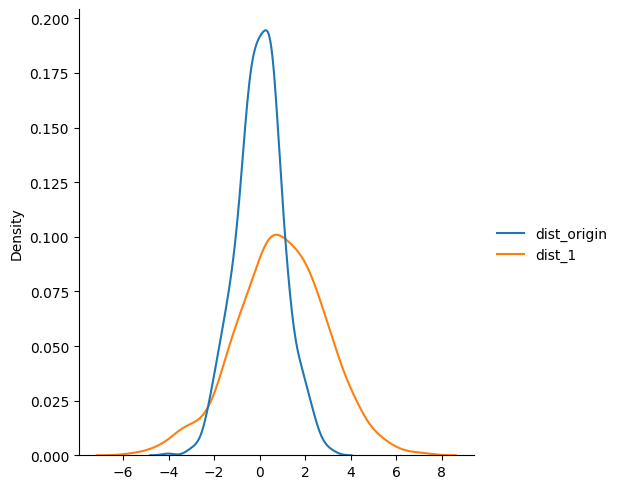

In [24]:
mu, sigma = 1, 2
dist_1 = np.random.normal(mu, sigma, 1000)

sns.displot(
    dict(
        dist_origin=dist_origin,
        dist_1=dist_1,
    ), multiple="layer", kind="kde"
)

kld = KLDivergenceLoss(torch.Tensor([mu]), torch.Tensor([np.log(np.square(sigma))]))
print(f"KL-Divergence Í∞íÏùÄ {kld} ÏûÖÎãàÎã§.")

2. ÌèâÍ∑†Ïù¥ 2Ïù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0.1Ïù∏ Ï†ïÍ∑ú Î∂ÑÌè¨

KL-Divergence Í∞íÏùÄ 3.8075852394104004 ÏûÖÎãàÎã§.


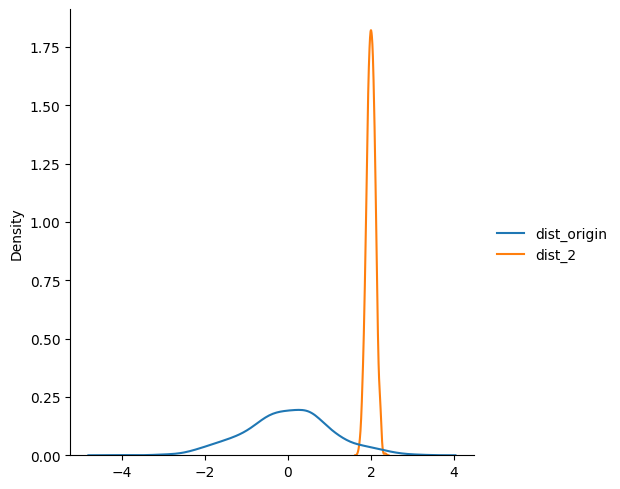

In [25]:
mu, sigma = 2, 0.1
dist_2 = np.random.normal(mu, sigma, 1000)

sns.displot(
    dict(
        dist_origin=dist_origin,
        dist_2=dist_2,
    ), multiple="layer", kind="kde"
)

kld = KLDivergenceLoss(torch.Tensor([mu]), torch.Tensor([np.log(np.square(sigma))]))
print(f"KL-Divergence Í∞íÏùÄ {kld} ÏûÖÎãàÎã§.")

3. ÌèâÍ∑†Ïù¥ 0Ïù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1Ïù∏ ÌëúÏ§Ä Ï†ïÍ∑ú Î∂ÑÌè¨

KL-Divergence Í∞íÏùÄ 0.0 ÏûÖÎãàÎã§.


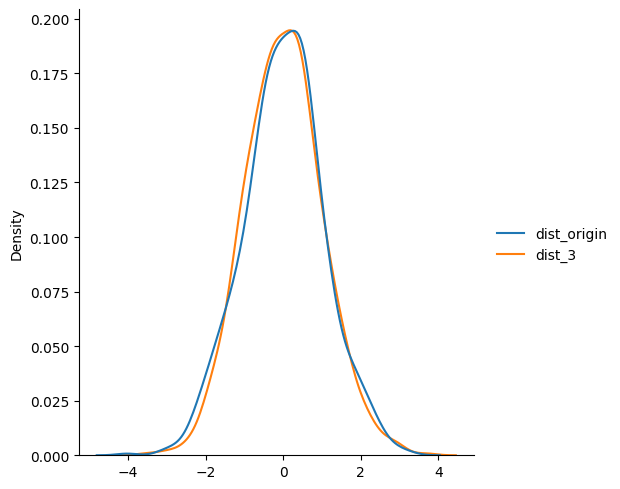

In [26]:
mu, sigma = 0, 1
dist_3 = np.random.normal(mu, sigma, 1000)

sns.displot(
    dict(
        dist_origin=dist_origin,
        dist_3=dist_3,
    ), multiple="layer", kind="kde"
)

kld = KLDivergenceLoss(torch.Tensor([mu]), torch.Tensor([np.log(np.square(sigma))]))
print(f"KL-Divergence Í∞íÏùÄ {kld} ÏûÖÎãàÎã§.")